In [28]:
from carla.data.catalog import OnlineCatalog
from carla.models.catalog import MLModelCatalog
from carla.models.negative_instances import predict_negative_instances
import carla.recourse_methods.catalog as recourse_catalog

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# load catalog dataset
data_name = "adult"
dataset = OnlineCatalog(data_name)

In [30]:
# load catalog model
ml_model = MLModelCatalog(
    dataset,
    model_type="linear",
    load_online=True,
    backend="pytorch"
)

In [31]:
# define the recourse method
hyperparams = {"loss_type": "BCE", "binary_cat_features": False, "lambda_":0.001}
recourse_method = recourse_catalog.Wachter(ml_model, hyperparams)

In [32]:
# get some negative instances
factuals = predict_negative_instances(ml_model, dataset.df)
factuals = factuals[:100]

In [33]:
df_cfs = recourse_method.get_counterfactuals(factuals)
display(df_cfs)

[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactual Explanation Found [wachter.py wachter_recourse]
[INFO] Counterfactua

,age,fnlwgt,education-num,capital-gain,capital-loss,...,relationship_Non-Husband,race_White,sex_Male,native-country_US,income
0,0.399536,-0.053974,0.898170,0.119912,0.098169,...,1.0,1.0,0.0,0.0,1.0
2,0.500337,-0.074960,0.746008,0.212677,0.212672,...,1.0,0.0,0.0,0.0,1.0
3,0.581714,0.061977,0.488567,0.088568,0.088566,...,0.0,0.0,1.0,1.0,1.0
6,0.718907,-0.180345,0.547228,0.280565,0.280559,...,1.0,0.0,0.0,0.0,1.0
7,0.489452,0.123519,0.543333,0.010000,0.010000,...,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
119,0.291246,-0.161508,0.756096,0.222765,0.222760,...,1.0,0.0,0.0,0.0,1.0
120,0.267785,-0.085932,0.813000,0.213002,0.212997,...,1.0,0.0,0.0,0.0,1.0
122,0.334024,-0.111976,0.955949,0.155951,0.155947,...,1.0,0.0,0.0,0.0,1.0
124,0.249851,-0.026592,0.822463,0.222466,0.222460,...,1.0,0.0,0.0,0.0,1.0


In [34]:
nn_cfs = df_cfs.dropna()
nn_factuals = factuals[factuals.index.isin(nn_cfs.index)]

In [35]:
cont_cols = dataset.continuous
cat_cols = list(set(nn_cfs.columns) - set(dataset.continuous) - set(dataset.target))

In [36]:
diff = nn_cfs - nn_factuals
display(diff)

,age,capital-gain,capital-loss,education-num,fnlwgt,...,occupation_Other,race_White,relationship_Non-Husband,sex_Male,workclass_Private
0,0.098166,0.098172,0.098169,0.098170,-0.098106,...,0.0,0.0,0.0,-1.0,-0.098102
2,0.212665,0.212677,0.212672,0.212675,-0.212542,...,0.0,-1.0,0.0,-1.0,-0.212534
3,0.088563,0.088568,0.088566,0.088567,-0.088510,...,0.0,0.0,0.0,0.0,-0.088506
6,0.280551,0.280565,0.280559,0.280562,-0.280406,...,0.0,0.0,0.0,0.0,-0.280397
7,0.010000,0.010000,0.010000,0.010000,-0.010000,...,0.0,0.0,0.0,0.0,-0.010000
...,...,...,...,...,...,...,...,...,...,...,...
119,0.222753,0.222765,0.222760,0.222763,-0.222631,...,0.0,-1.0,0.0,-1.0,-0.222624
120,0.212991,0.213002,0.212997,0.213000,-0.212871,...,0.0,-1.0,0.0,0.0,-0.212863
122,0.155942,0.155951,0.155947,0.155949,-0.155855,...,1.0,0.0,0.0,-1.0,-0.155849
124,0.222453,0.222466,0.222460,0.222463,-0.222328,...,0.0,0.0,0.0,-1.0,-0.222320


Text(0, 0.5, 'feature')

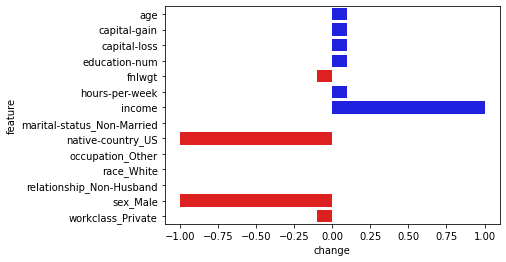

In [46]:
y = diff.iloc[0]
colors = ["red" if y[i] < 0 else "blue" for i in range(len(y))]

ax = sns.barplot(x=y.values, y=y.index, palette=colors)
ax.set_xlabel("change")
ax.set_ylabel("feature")

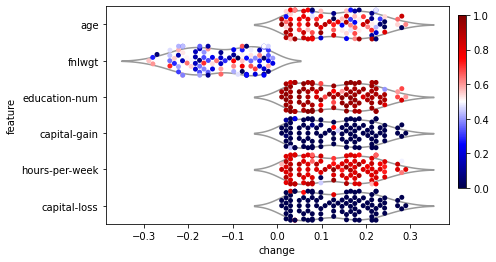

In [64]:
ax = sns.violinplot(x="value", y="variable", data=diff[cont_cols].melt(), color="white", inner=None)
ax = sns.swarmplot(x="value", y="variable", data=diff[cont_cols].melt(), hue=nn_factuals[cont_cols].melt()["value"], palette="seismic")
ax.set_xlabel("change")
ax.set_ylabel("feature")

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=0.0, vmax=1.0, cmap="seismic")

# Make space for the colorbar
ax.figure.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = ax.figure.add_axes([.94, .25, .02, .6])

ax.get_legend().remove()
ax.figure.colorbar(points, cax=cax)
plt.show()

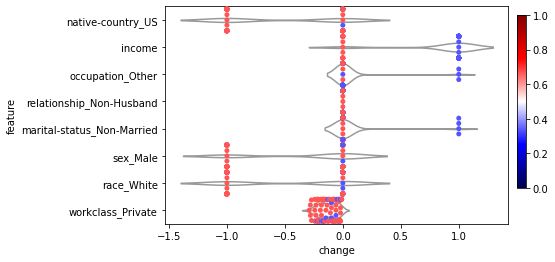

In [69]:
ax = sns.violinplot(x="value", y="variable", data=diff[cat_cols].melt(), color="white", inner=None)
ax = sns.swarmplot(x="value", y="variable", data=diff[cat_cols].melt(), hue=nn_factuals[cat_cols].melt()["value"], palette="seismic")
ax.set_xlabel("change")
ax.set_ylabel("feature")

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=0.0, vmax=1.0, cmap="seismic")

# Make space for the colorbar
ax.figure.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = ax.figure.add_axes([.94, .25, .02, .6])

ax.get_legend().remove()
ax.figure.colorbar(points, cax=cax)
plt.show()